# Задание

Датасет про [диабет](https://www.kaggle.com/datasets/abdallamahgoub/diabetes/data)

1. Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.
2. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3d-визуализацию признаков.
3. Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas. 
4. Постройте две модели k-NN с различными наборами признаков:
  - Модель 1: Признаки случайно отбираются.
  - Модель 2: Фиксированный набор признаков, который выбирается заранее.
5. Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k, например, k=3, k=5, k=10, и т. д. Постройте матрицу ошибок.

# Решение

Импортируем необходимые библиотеки

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Предварительная обработка данных

### 1.1. Загрузка данных

In [83]:
file_path = './archive/diabetes.csv'
data = pd.read_csv(file_path)

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1.2. Обработка отсутствующих значений

Проверим наличие пропущенных значений в датасете и удалим строки с пропущенными значениями.

In [84]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)
rows_to_delete = data.isnull().any(axis=1).sum()
data = data.dropna()
print("Deleted rows:", rows_to_delete)

Missing values per column:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64
Deleted rows: 0


Удаляем строки с нулевыми значениями для столбцов Glucose, BloodPressure, SkinThickness, BMI

In [85]:
zero_values = (data[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] == 0).sum()
print("Zero values per column:")
print(zero_values)
rows_to_delete = (data[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] == 0).any(axis=1).sum()
data = data[(data[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] != 0).all(axis=1)]
print("Deleted rows:", rows_to_delete)
data.describe()

Zero values per column:
Glucose            5
BloodPressure     35
SkinThickness    227
BMI               11
dtype: int64
Deleted rows: 236


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,114.988722,32.890226,0.502966,31.614662,0.332707
std,3.312036,30.999226,12.310253,10.523878,123.007555,6.881109,0.344546,10.761584,0.471626
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,0.000000,27.875000,0.258750,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,91.500000,32.800000,0.416000,28.000000,0.000000
75%,5.000000,141.250000,80.000000,36.000000,165.250000,36.900000,0.658500,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 1.3. Нормализация данных

In [86]:
data = (data - data.min()) / (data.max() - data.min())
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.206877,0.454756,0.552391,0.241112,0.135920,0.300414,0.179000,0.176911,0.332707
std,0.194826,0.216778,0.143142,0.114390,0.145399,0.140718,0.147557,0.179360,0.471626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.298951,0.465116,0.163043,0.000000,0.197853,0.074411,0.033333,0.000000
50%,0.117647,0.412587,0.558140,0.239130,0.108156,0.298569,0.141756,0.116667,0.000000
75%,0.294118,0.596154,0.651163,0.315217,0.195331,0.382413,0.245610,0.283333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4. Разделение данных на обучающую и тестовую выборки

In [87]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]


X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Визуализация данных

### 2.1. Визуализация статистики по датасету

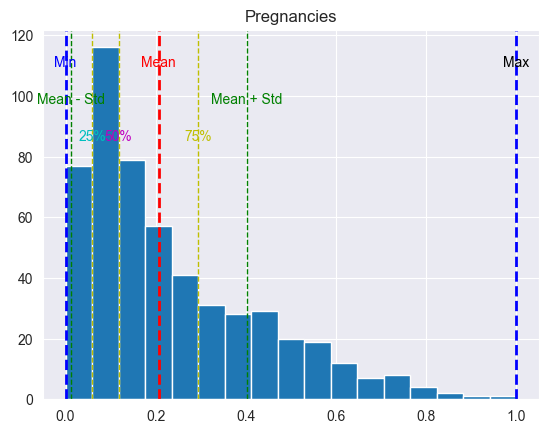

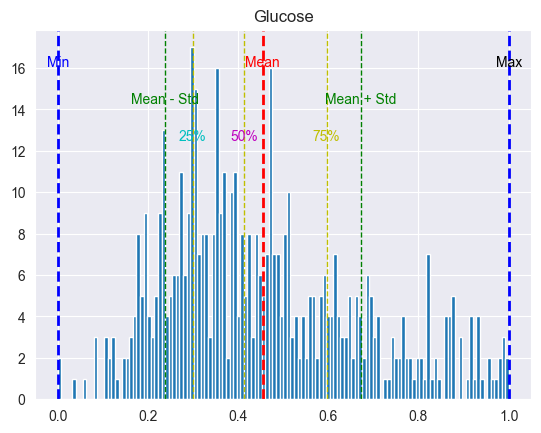

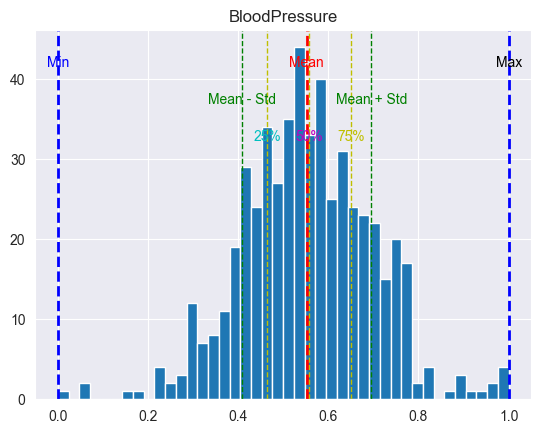

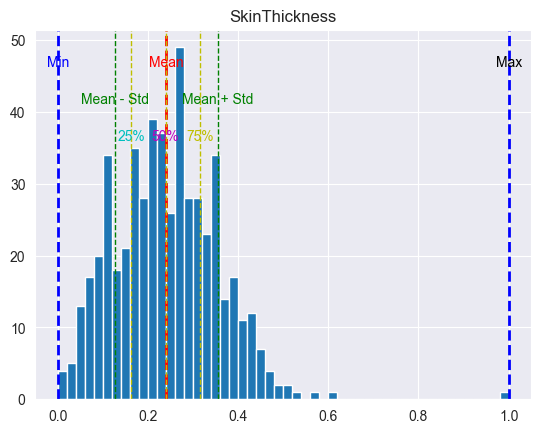

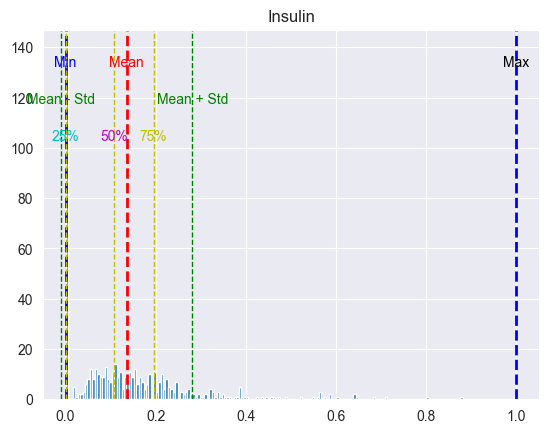

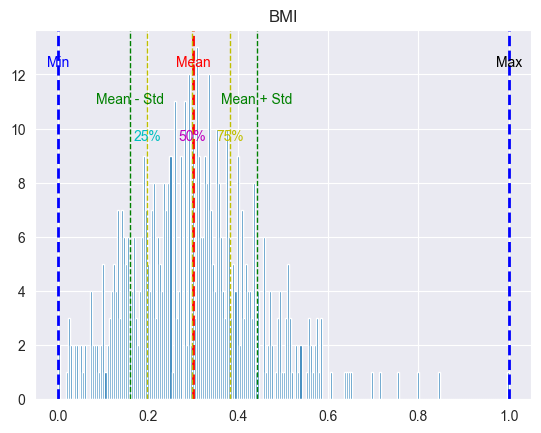

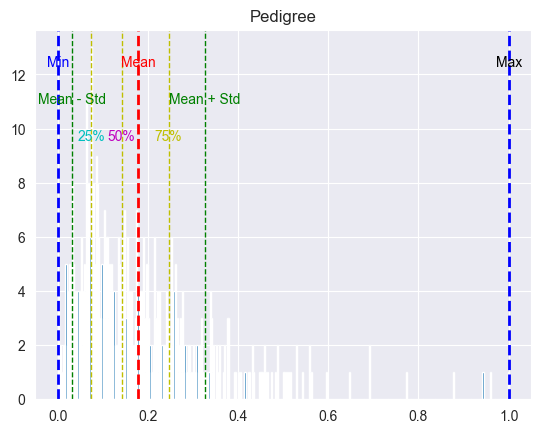

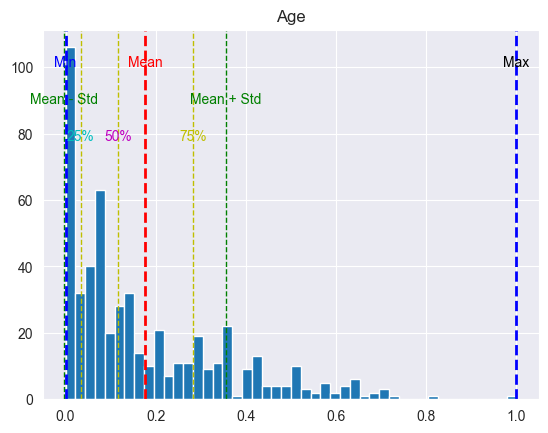

In [88]:
desc = data.describe()

for col in data.columns:
    if col == 'Outcome':
        continue
    plt.figure()
    data[col].hist(bins=len(data[col].unique()))
    
    mean = desc[col]['mean']
    std = desc[col]['std']
    min_val = desc[col]['min']
    q25 = desc[col]['25%']
    median = desc[col]['50%']
    q75 = desc[col]['75%']
    max_val = desc[col]['max']
    
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    plt.text(mean, plt.ylim()[1]*0.9, 'Mean', color='r', ha='center')
    
    plt.axvline(mean + std, color='g', linestyle='dashed', linewidth=1)
    plt.text(mean + std, plt.ylim()[1]*0.8, 'Mean + Std', color='g', ha='center')
    
    plt.axvline(mean - std, color='g', linestyle='dashed', linewidth=1)
    plt.text(mean - std, plt.ylim()[1]*0.8, 'Mean - Std', color='g', ha='center')
    
    plt.axvline(min_val, color='b', linestyle='dashed', linewidth=2)
    plt.text(min_val, plt.ylim()[1]*0.9, 'Min', color='b', ha='center')
    
    plt.axvline(q25, color='y', linestyle='dashed', linewidth=1)
    plt.text(q25, plt.ylim()[1]*0.7, '25%', color='c', ha='center')
    
    plt.axvline(median, color='y', linestyle='dashed', linewidth=1)
    plt.text(median, plt.ylim()[1]*0.7, '50%', color='m', ha='center')
    
    plt.axvline(q75, color='y', linestyle='dashed', linewidth=1)
    plt.text(q75, plt.ylim()[1]*0.7, '75%', color='y', ha='center')
    
    plt.axvline(max_val, color='b', linestyle='dashed', linewidth=2)
    plt.text(max_val, plt.ylim()[1]*0.9, 'Max', color='k', ha='center')
    
    plt.title(col)
    plt.show()

### 2.2. Корреляционная матрица

Correlation matrix:
                Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.125330       0.204663       0.095085 -0.006568   
Glucose           0.125330  1.000000       0.219178       0.226590  0.459905   
BloodPressure     0.204663  0.219178       1.000000       0.226072  0.007052   
SkinThickness     0.095085  0.226590       0.226072       1.000000  0.126240   
Insulin          -0.006568  0.459905       0.007052       0.126240  1.000000   
BMI               0.008576  0.247079       0.307357       0.647422  0.191168   
Pedigree          0.007435  0.165817       0.008047       0.118636  0.151531   
Age               0.640747  0.278907       0.346939       0.161336  0.081126   
Outcome           0.252586  0.503614       0.183432       0.254874  0.212204   

                    BMI  Pedigree       Age   Outcome  
Pregnancies    0.008576  0.007435  0.640747  0.252586  
Glucose        0.247079  0.165817  0.278907  0.503614  
BloodPress

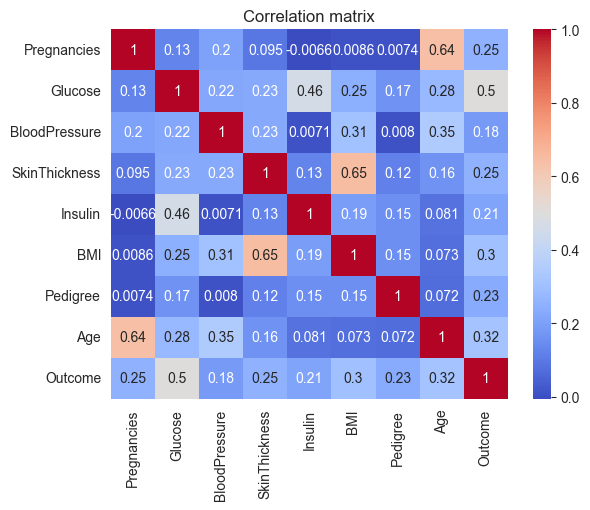

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
print("Correlation matrix:\n", correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


### 2.3. 3D-визуализация признаков

3 случайных признака

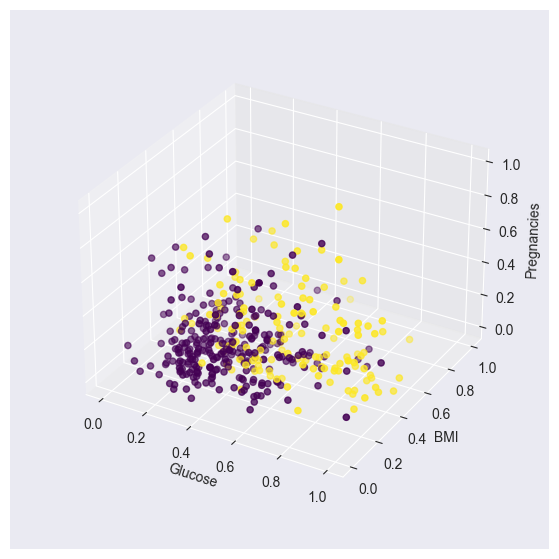

In [90]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

random_columns = X_train.sample(3, axis=1, random_state=42)
x = random_columns.iloc[:, 0]
y = random_columns.iloc[:, 1]
z = random_columns.iloc[:, 2]

ax.scatter(x, y, z, c=y_train, cmap='viridis')
ax.set_xlabel(random_columns.columns[0])
ax.set_ylabel(random_columns.columns[1])
ax.set_zlabel(random_columns.columns[2])
ax.set_box_aspect(None, zoom=0.85)
plt.show()

Выбранные признаки

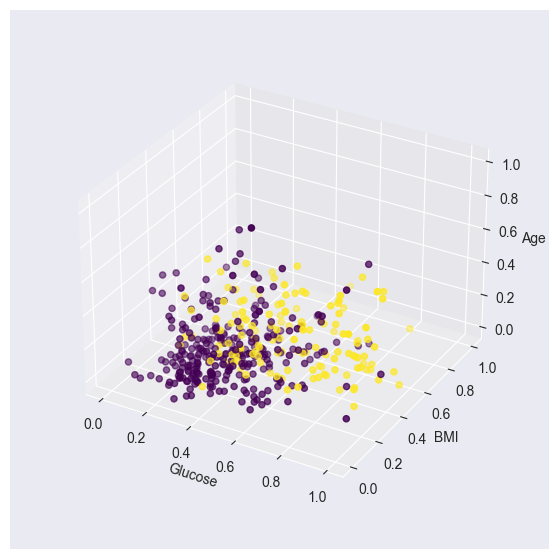

In [91]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = X_train['Glucose']
y = X_train['BMI']
z = X_train['Age']

ax.scatter(x, y, z, c=y_train, cmap='viridis')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_box_aspect(None, zoom=0.85)
plt.show()

## 3. Метод k-ближайших соседей

In [92]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
def k_nearest_neighbors(train_data, train_labels, test_point, k=3):
    train_data = np.array(train_data)
    train_labels = np.array(train_labels)
    
    distances = []
    for i in range(len(train_data)):
        distance = euclidean_distance(train_data[i], test_point)
        distances.append((distance, train_labels[i]))
        
    nearest_indices = np.argpartition([distance for distance, _ in distances], k)[:k]
    nearest_labels = [int(train_labels[i]) for i in nearest_indices]
    
    most_common = np.bincount(nearest_labels).argmax()
    return most_common

## 4. Построение моделей k-NN

### 4.1. Модель 1: Признаки случайно отбираются

In [94]:
from sklearn.metrics import accuracy_score

random_features = X_train.sample(n=3, axis=1, random_state=10)
X_test_random = X_test[random_features.columns]

print("Random features:", random_features.columns)
for k in [3, 5, 10]:
    y_pred = [k_nearest_neighbors(random_features.values, y_train.values, test_point, k=k) for test_point in X_test_random.values]
    
    confusion = np.zeros((2, 2), dtype=int)
    for actual, predicted in zip(y_test, y_pred):
        confusion[int(actual), int(predicted)] += 1
        
    print(f"Confusion matrix for k={k}:")
    print(confusion)
    print(accuracy_score(y_test, y_pred))


Random features: Index(['BloodPressure', 'SkinThickness', 'Pedigree'], dtype='object')
Confusion matrix for k=3:
[[50 23]
 [17 16]]
0.6226415094339622
Confusion matrix for k=5:
[[58 15]
 [16 17]]
0.7075471698113207
Confusion matrix for k=10:
[[63 10]
 [23 10]]
0.6886792452830188


### 4.2. Модель 2: Фиксированный набор признаков

In [95]:
from sklearn.metrics import accuracy_score

fixed_features = X_train[['Glucose', 'BMI', 'Age']]
X_test_fixed = X_test[['Glucose', 'BMI', 'Age']]

print("Fixed features:", fixed_features.columns)
for k in [3, 5, 10]:
    y_pred = [k_nearest_neighbors(fixed_features.values, y_train.values, test_point, k=k) for test_point in X_test_fixed.values]
    
    confusion = np.zeros((2, 2), dtype=int)
    for actual, predicted in zip(y_test, y_pred):
        confusion[int(actual), int(predicted)] += 1

    print(f"Confusion matrix for k={k}:")
    print(confusion)
    print(accuracy_score(y_test, y_pred))
    

Fixed features: Index(['Glucose', 'BMI', 'Age'], dtype='object')
Confusion matrix for k=3:
[[58 15]
 [12 21]]
0.7452830188679245
Confusion matrix for k=5:
[[60 13]
 [12 21]]
0.7641509433962265
Confusion matrix for k=10:
[[66  7]
 [14 19]]
0.8018867924528302
